In [1]:
from sklearn.datasets import make_classification
X, Y = make_classification(
    n_features=4, n_redundant=0, n_informative=3, n_clusters_per_class=2, n_classes=3
)

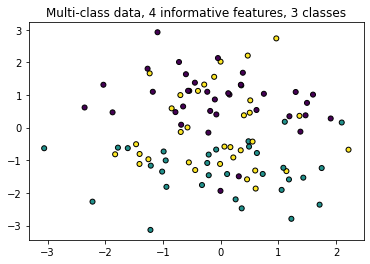

In [2]:
import matplotlib.pyplot as plt
plt.title("Multi-class data, 4 informative features, 3 classes", fontsize="large")
plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y, s=25, edgecolor="k")

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [3]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((67, 4), (33, 4), (67,), (33,))

In [4]:
import numpy as np
import torch

Y_test = torch.from_numpy(X_test)
Y_test = torch.from_numpy(np.asarray(Y_test))

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
        self.X=torch.from_numpy(X_train)
        self.Y=torch.from_numpy(Y_train)
        self.len=self.X.shape[0]
    def __getitem__(self,index):      
        return self.X[index], self.Y[index]
    def __len__(self):
        return self.len
data=Data()
loader=DataLoader(dataset=data,batch_size=64)

In [6]:
print(data.X[0:5])
print(data.X.shape)
print(data.Y[0:5])
print(data.Y.shape)

tensor([[-1.4070, -1.1132, -1.0593, -0.9450],
        [ 1.0849, -1.2304, -0.2584,  2.0537],
        [-0.1138,  1.5578,  1.8131, -2.8091],
        [-0.2337, -1.0830, -1.6858, -0.3594],
        [ 1.3632,  0.3618,  1.6503, -1.6425]], dtype=torch.float64)
torch.Size([67, 4])
tensor([2, 1, 2, 1, 2], dtype=torch.int32)
torch.Size([67])


In [7]:
input_dim=4     # how many Variables are in the dataset
hidden_dim = 25 # hidden layers
output_dim=3    # number of classes
import torch.nn as nn
class Net(nn.Module):
    def __init__(self,input,H,output):
        super(Net,self).__init__()
        self.linear1=nn.Linear(input,H)
        self.linear2=nn.Linear(H,output)
 
        
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=self.linear2(x)
        return x

In [8]:
clf=Net(input_dim,hidden_dim,output_dim)
print(clf.parameters)

<bound method Module.parameters of Net(
  (linear1): Linear(in_features=4, out_features=25, bias=True)
  (linear2): Linear(in_features=25, out_features=3, bias=True)
)>


In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(clf.parameters(), lr=0.1)

learning_rate = 1e-1
loss_list = []
for t in range(1000):
    y_pred = clf(x)
    loss = criterion(y_pred, y)
    loss_list.append(loss.item())
    clf.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in clf.parameters():
            param -= learning_rate * param.grad

step = np.linspace(0,1000,1000)
plt.plot(step,np.array(loss_list))


In [ ]:
x_val = torch.from_numpy(X_test)
z=clf(x_val)
yhat=torch.max(z.data,1)
yhat[1]